In [1]:
import os as os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
# accsess the data files
cancer_rays_dir     = os.listdir("/kaggle/input/breast-cancer/archive_breast_c/archive_breast_c/archive_breast_cancer") 
all_rays_dir        = "/kaggle/input/breast-cancer/z/z/all_rays_dir" 
cancer_rays_dir_str ="/kaggle/input/breast-cancer/archive_breast_c/archive_breast_c/archive_breast_cancer/"

In [3]:
print(cancer_rays_dir)
print(len(cancer_rays_dir)) 

['10295', '10304', '12868', '10274', '12818', '14190', '12869', '9323', '10291', '12906', '9176', '8984', '10299', '12930', '9344', '12935', '12894', '12909', '9381', '9346', '9175', '10262', '8980', '16896', '12241', '12910', '13617', '13401', '12891', '10300', '9076', '10259', '9124', '13402', '12870', '16550', '10255', '9261', '15471', '12931', '12955', '10258', '13461', '13023', '9260', '8957', '9035', '10268', '13403', '10288', '9262', '12911', '9319', '10254', '13616', '10253', '8974', '9135', '10257', '9291', '9320', '14209', '14078', '12749', '9043', '9041', '8975', '9075', '13025', '13021', '13458', '12901', '16552', '13688', '15902', '13692', '12879', '9073', '15514', '9325', '10277', '12810', '8864', '8917', '14305', '16167', '13022', '16555', '12932', '14189', '8867', '16166', '10290', '9083', '15840', '12907', '12880', '12908', '13693', '13591', '15516', '9228', '14192', '12949', '10306', '9345', '14156', '12872', '9123', '13019', '9226', '14304', '10260', '14154', '15472'

In [4]:
 all_rays_dir_lst = os.listdir(all_rays_dir) 
len(all_rays_dir_lst)

277524

In [5]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data.head()


image_id
0  13462_idx5_x1851_y2551_class0.png
1    14082_idx5_x601_y851_class0.png
2    9260_idx5_x2901_y501_class0.png
3  12954_idx5_x1601_y2251_class0.png
4   13688_idx5_x1151_y751_class0.png

In [6]:
#Based on the addition that we added earlier in the path, we divide the data
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head(10)

image_id target
0  13462_idx5_x1851_y2551_class0.png      0
1    14082_idx5_x601_y851_class0.png      0
2    9260_idx5_x2901_y501_class0.png      0
3  12954_idx5_x1601_y2251_class0.png      0
4   13688_idx5_x1151_y751_class0.png      0
5   12893_idx5_x601_y1401_class1.png      1
6     9022_idx5_x301_y901_class0.png      0
7   9382_idx5_x3051_y2251_class0.png      0
8  12951_idx5_x1601_y2051_class1.png      1
9  13693_idx5_x2201_y1051_class0.png      0

In [7]:
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    patient_id = a[0]
    
    return patient_id
data['patient_id'] = data['image_id'].apply(extract_patient_id)
data.head()

image_id target patient_id
0  13462_idx5_x1851_y2551_class0.png      0      13462
1    14082_idx5_x601_y851_class0.png      0      14082
2    9260_idx5_x2901_y501_class0.png      0       9260
3  12954_idx5_x1601_y2251_class0.png      0      12954
4   13688_idx5_x1151_y751_class0.png      0      13688

In [8]:
data['target'].value_counts()


target
0    198738
1     78786
Name: count, dtype: int64

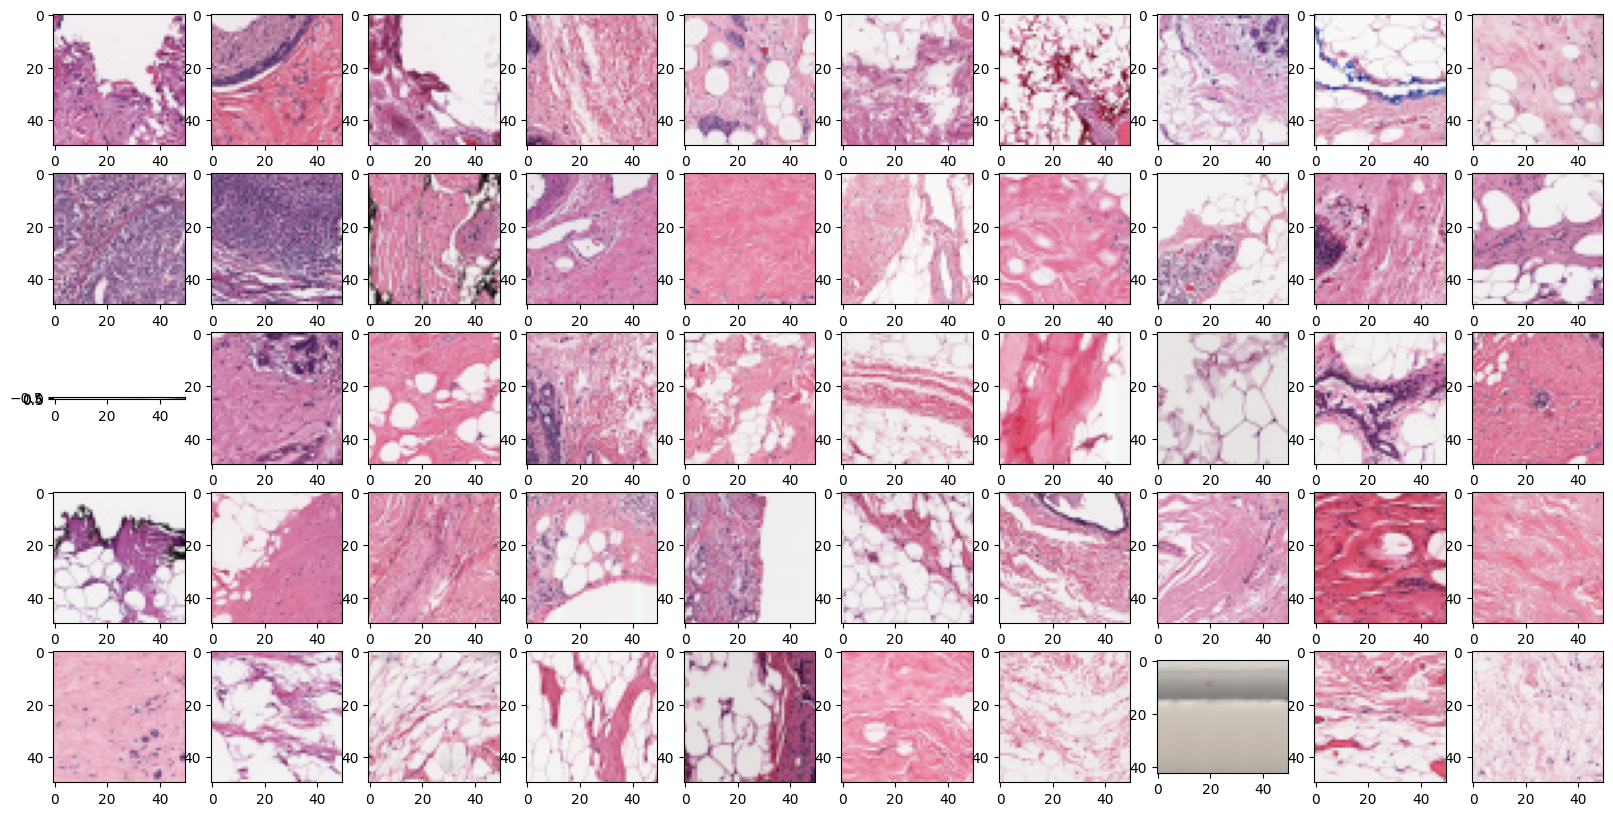

In [9]:
data.target = data.target.astype(int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(data[data.target ==1].index, size=50, replace=False,)
neg_selection = np.random.choice(data[data.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)




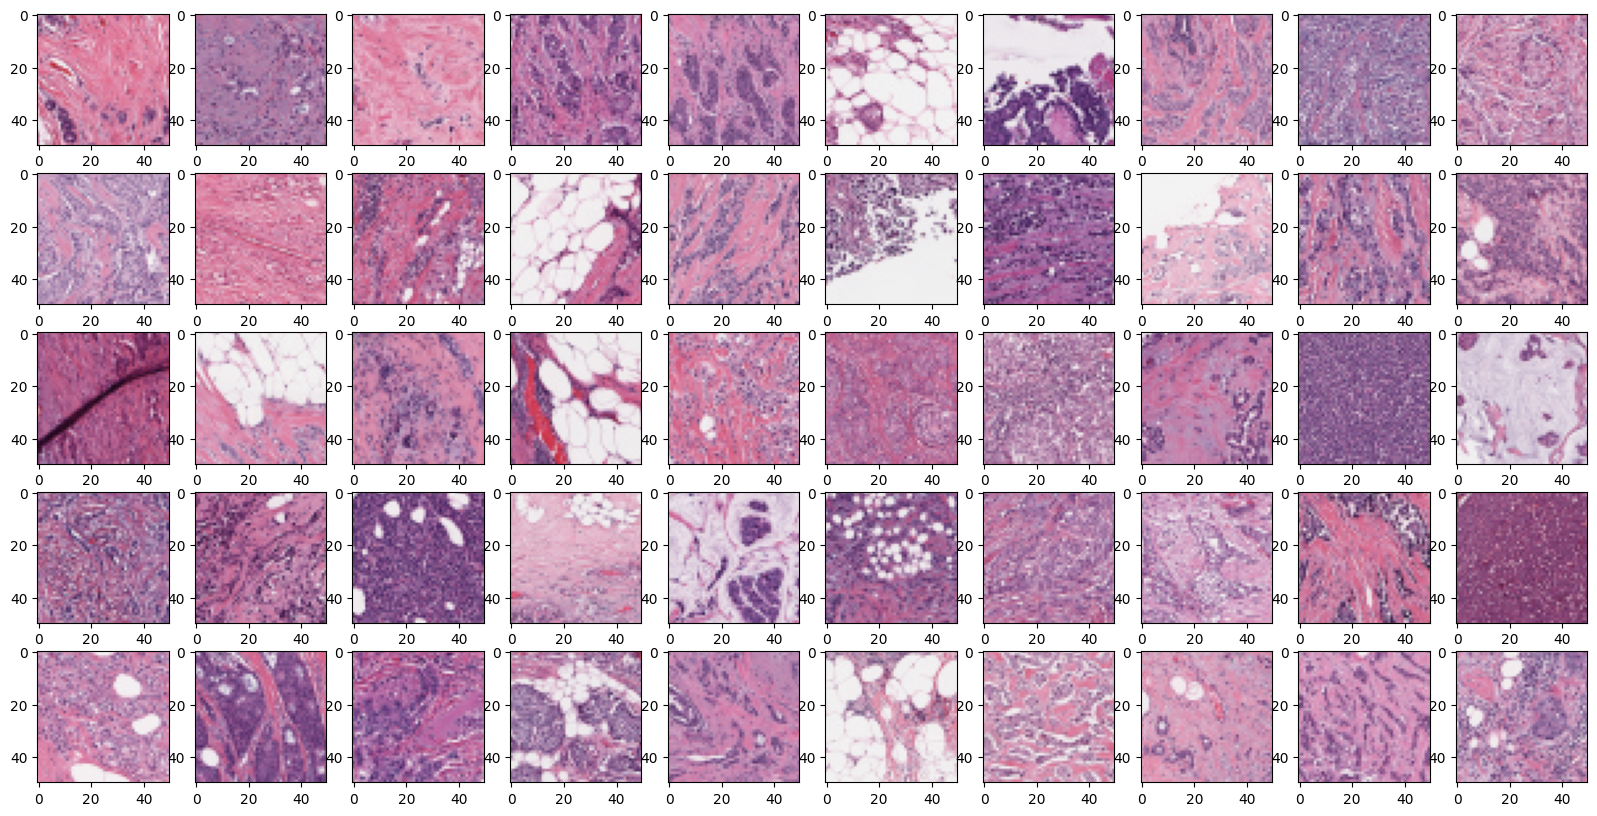

In [10]:
fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


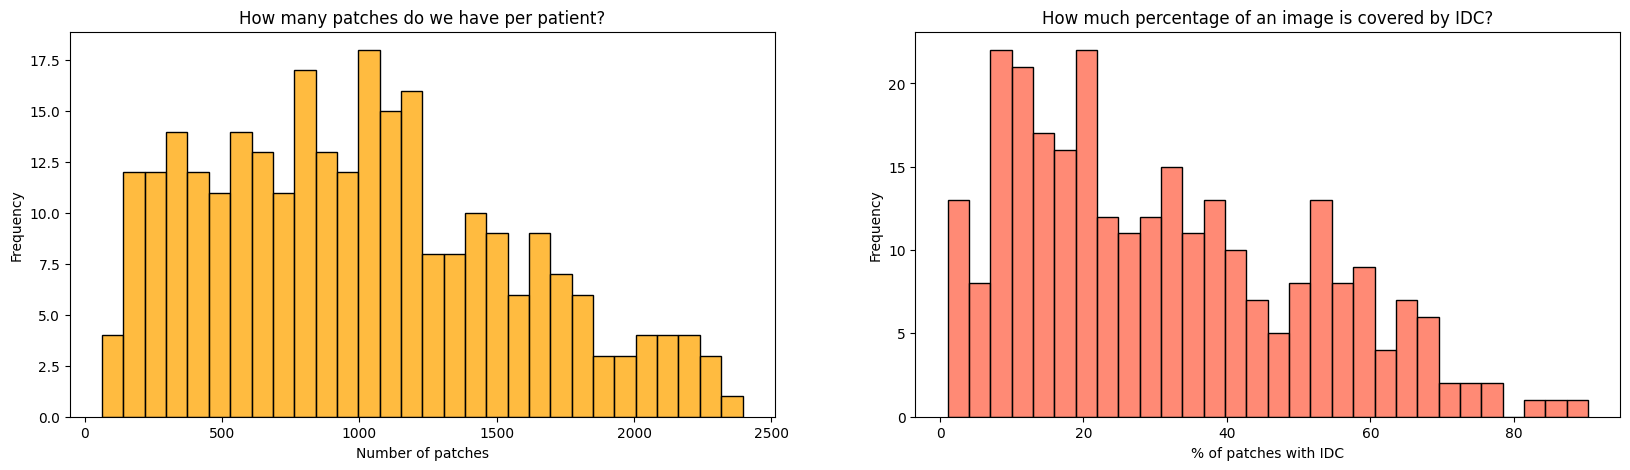

In [11]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.histplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
#sns.countplot(data.target, hue="cancer_perc" ,palette="Set2", ax=ax[2]);
#ax[2].set_xlabel("no(0) versus yes(1)")
#ax[2].set_title("How many patches show IDC?");

In [12]:
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = cancer_rays_dir_str + patient_id + "/" + cancer_id
    files = os.listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(int)
    return dataframe
def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df =pd.concat([df_0, df_1])
    return patient_df

In [13]:
example = get_patient_dataframe(data.patient_id.values[0])
example.head()

x     y  target                                               path
0  1851  2551       0  /kaggle/input/breast-cancer/archive_breast_c/a...
1  1951  2001       0  /kaggle/input/breast-cancer/archive_breast_c/a...
2  2051  2651       0  /kaggle/input/breast-cancer/archive_breast_c/a...
3  2101  1551       0  /kaggle/input/breast-cancer/archive_breast_c/a...
4  2451  2501       0  /kaggle/input/breast-cancer/archive_breast_c/a...

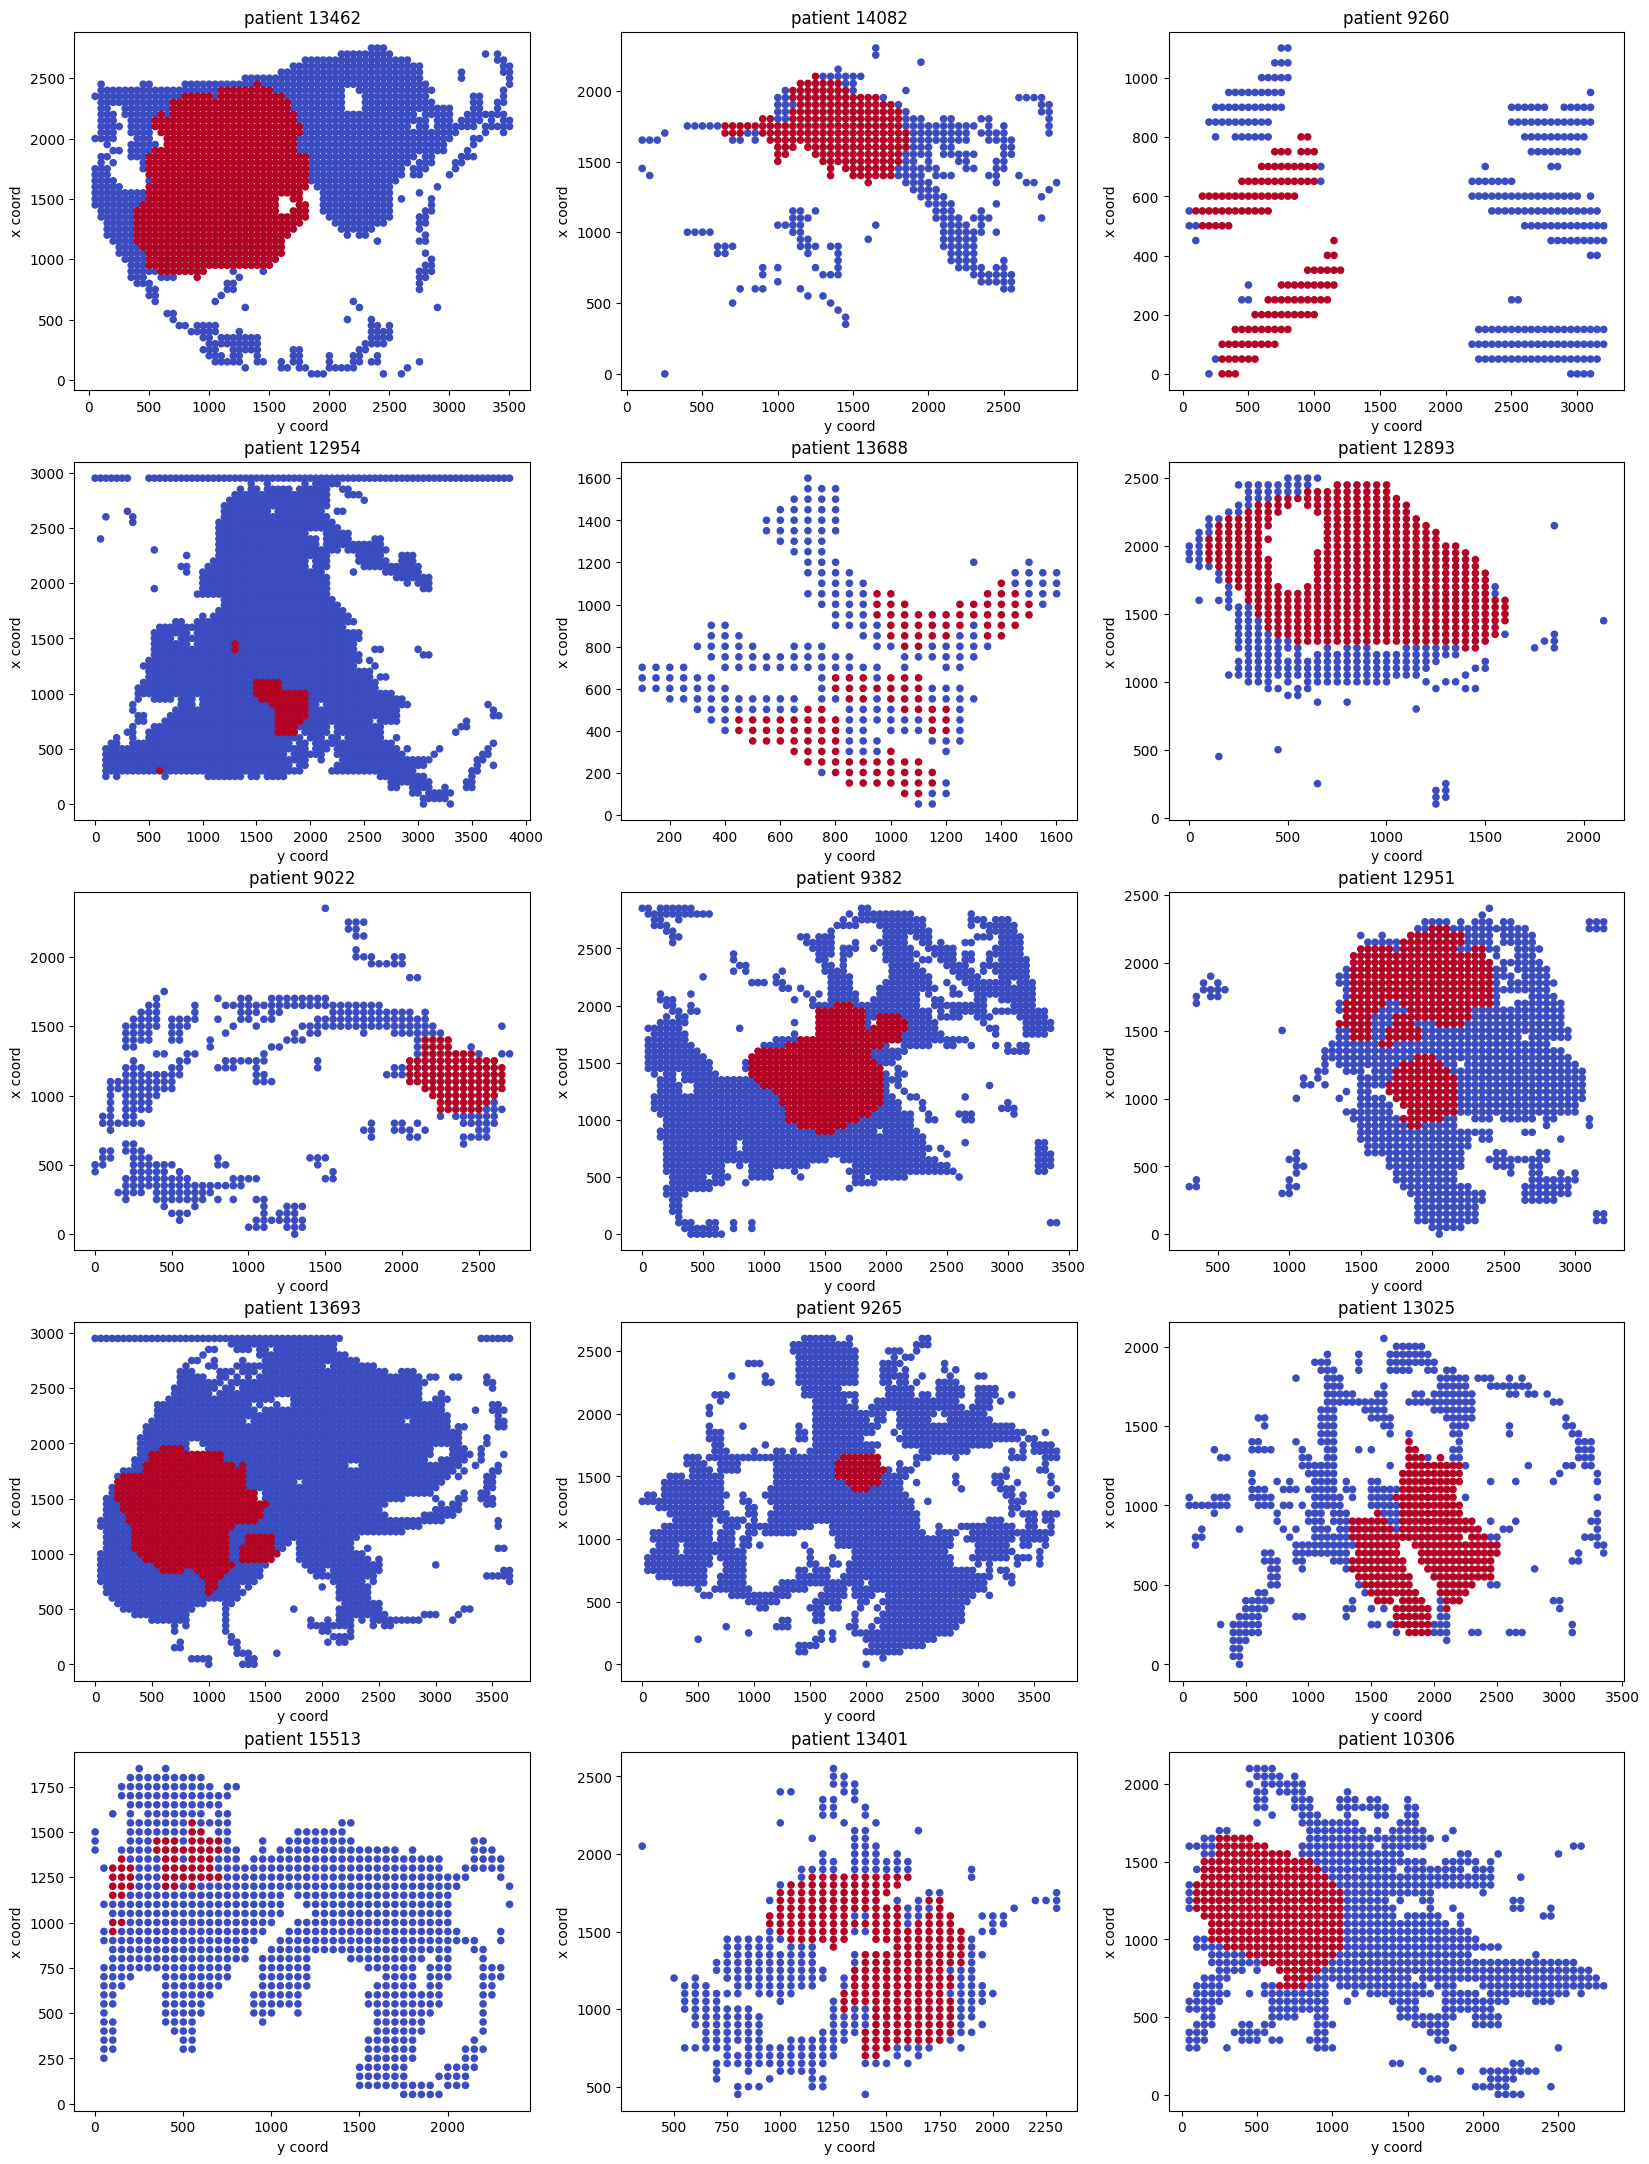

In [14]:
fig, ax = plt.subplots(5,3,figsize=(20, 27))

patient_ids = data.patient_id.unique()

for n in range(5):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

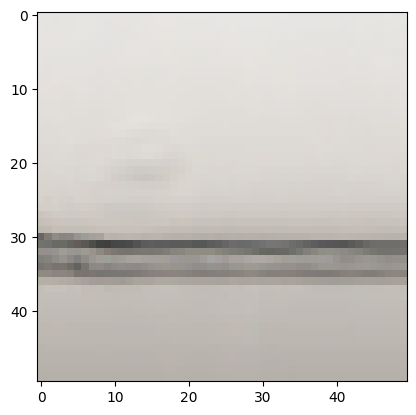

In [15]:
data.target = data.target.astype(int)
random_image_path = np.random.choice(data[data.target ==0].index, size=1, replace=False,)
path =os.path.join(all_rays_dir,data.loc[random_image_path[0], 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)

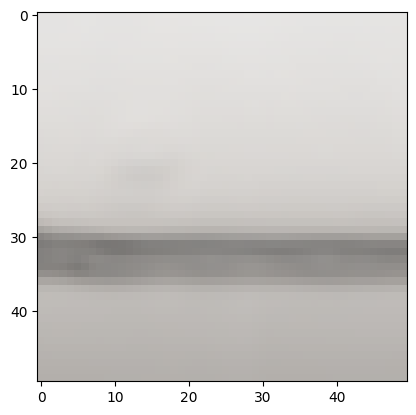

In [16]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

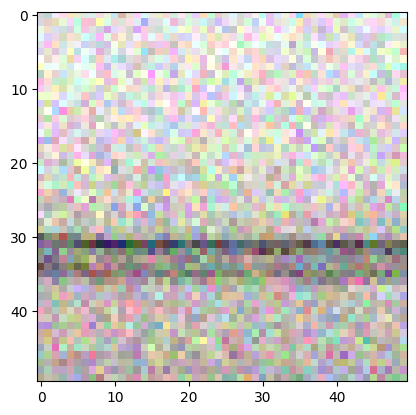

In [17]:
noise_image = random_noise(image)
plt.imshow(noise_image)

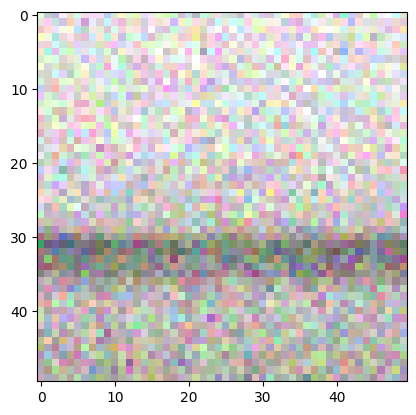

In [18]:
noise_gaussian_image = random_noise(gaussian_image)
plt.imshow(noise_gaussian_image)

In [19]:
processd_lst = os.listdir('/kaggle/input/breast-cancer/z/z/image_processing/noise_images')
processd_lst_str = '/kaggle/input/breast-cancer/z/z/image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

image_id
0  13462_idx5_x1851_y2551_class0.png
1    14082_idx5_x601_y851_class0.png
2    9260_idx5_x2901_y501_class0.png
3  12954_idx5_x1601_y2251_class0.png
4   13688_idx5_x1151_y751_class0.png

In [20]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0  13462_idx5_x1851_y2551_class0.png      0
1    14082_idx5_x601_y851_class0.png      0
2    9260_idx5_x2901_y501_class0.png      0
3  12954_idx5_x1601_y2251_class0.png      0
4   13688_idx5_x1151_y751_class0.png      0
5   12893_idx5_x601_y1401_class1.png      1
6     9022_idx5_x301_y901_class0.png      0
7   9382_idx5_x3051_y2251_class0.png      0
8  12951_idx5_x1601_y2051_class1.png      1
9  13693_idx5_x2201_y1051_class0.png      0

In [21]:
processd_data['target'].value_counts()


target
0    198738
1     78786
Name: count, dtype: int64

In [22]:
y = processd_data['target']
processd_train, processd_test = train_test_split(processd_data, test_size=0.10, random_state=101, stratify=y)
processd_test_pls =processd_test.image_id
processd_train_pls =processd_train.image_id

In [23]:
processd_lst = os.listdir('/kaggle/input/breast-cancer/z/z/image_processing/noise_images')
processd_lst_str = '/kaggle/input/breast-cancer/z/z/image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0  13462_idx5_x1851_y2551_class0.png      0
1    14082_idx5_x601_y851_class0.png      0
2    9260_idx5_x2901_y501_class0.png      0
3  12954_idx5_x1601_y2251_class0.png      0
4   13688_idx5_x1151_y751_class0.png      0
5   12893_idx5_x601_y1401_class1.png      1
6     9022_idx5_x301_y901_class0.png      0
7   9382_idx5_x3051_y2251_class0.png      0
8  12951_idx5_x1601_y2051_class1.png      1
9  13693_idx5_x2201_y1051_class0.png      0

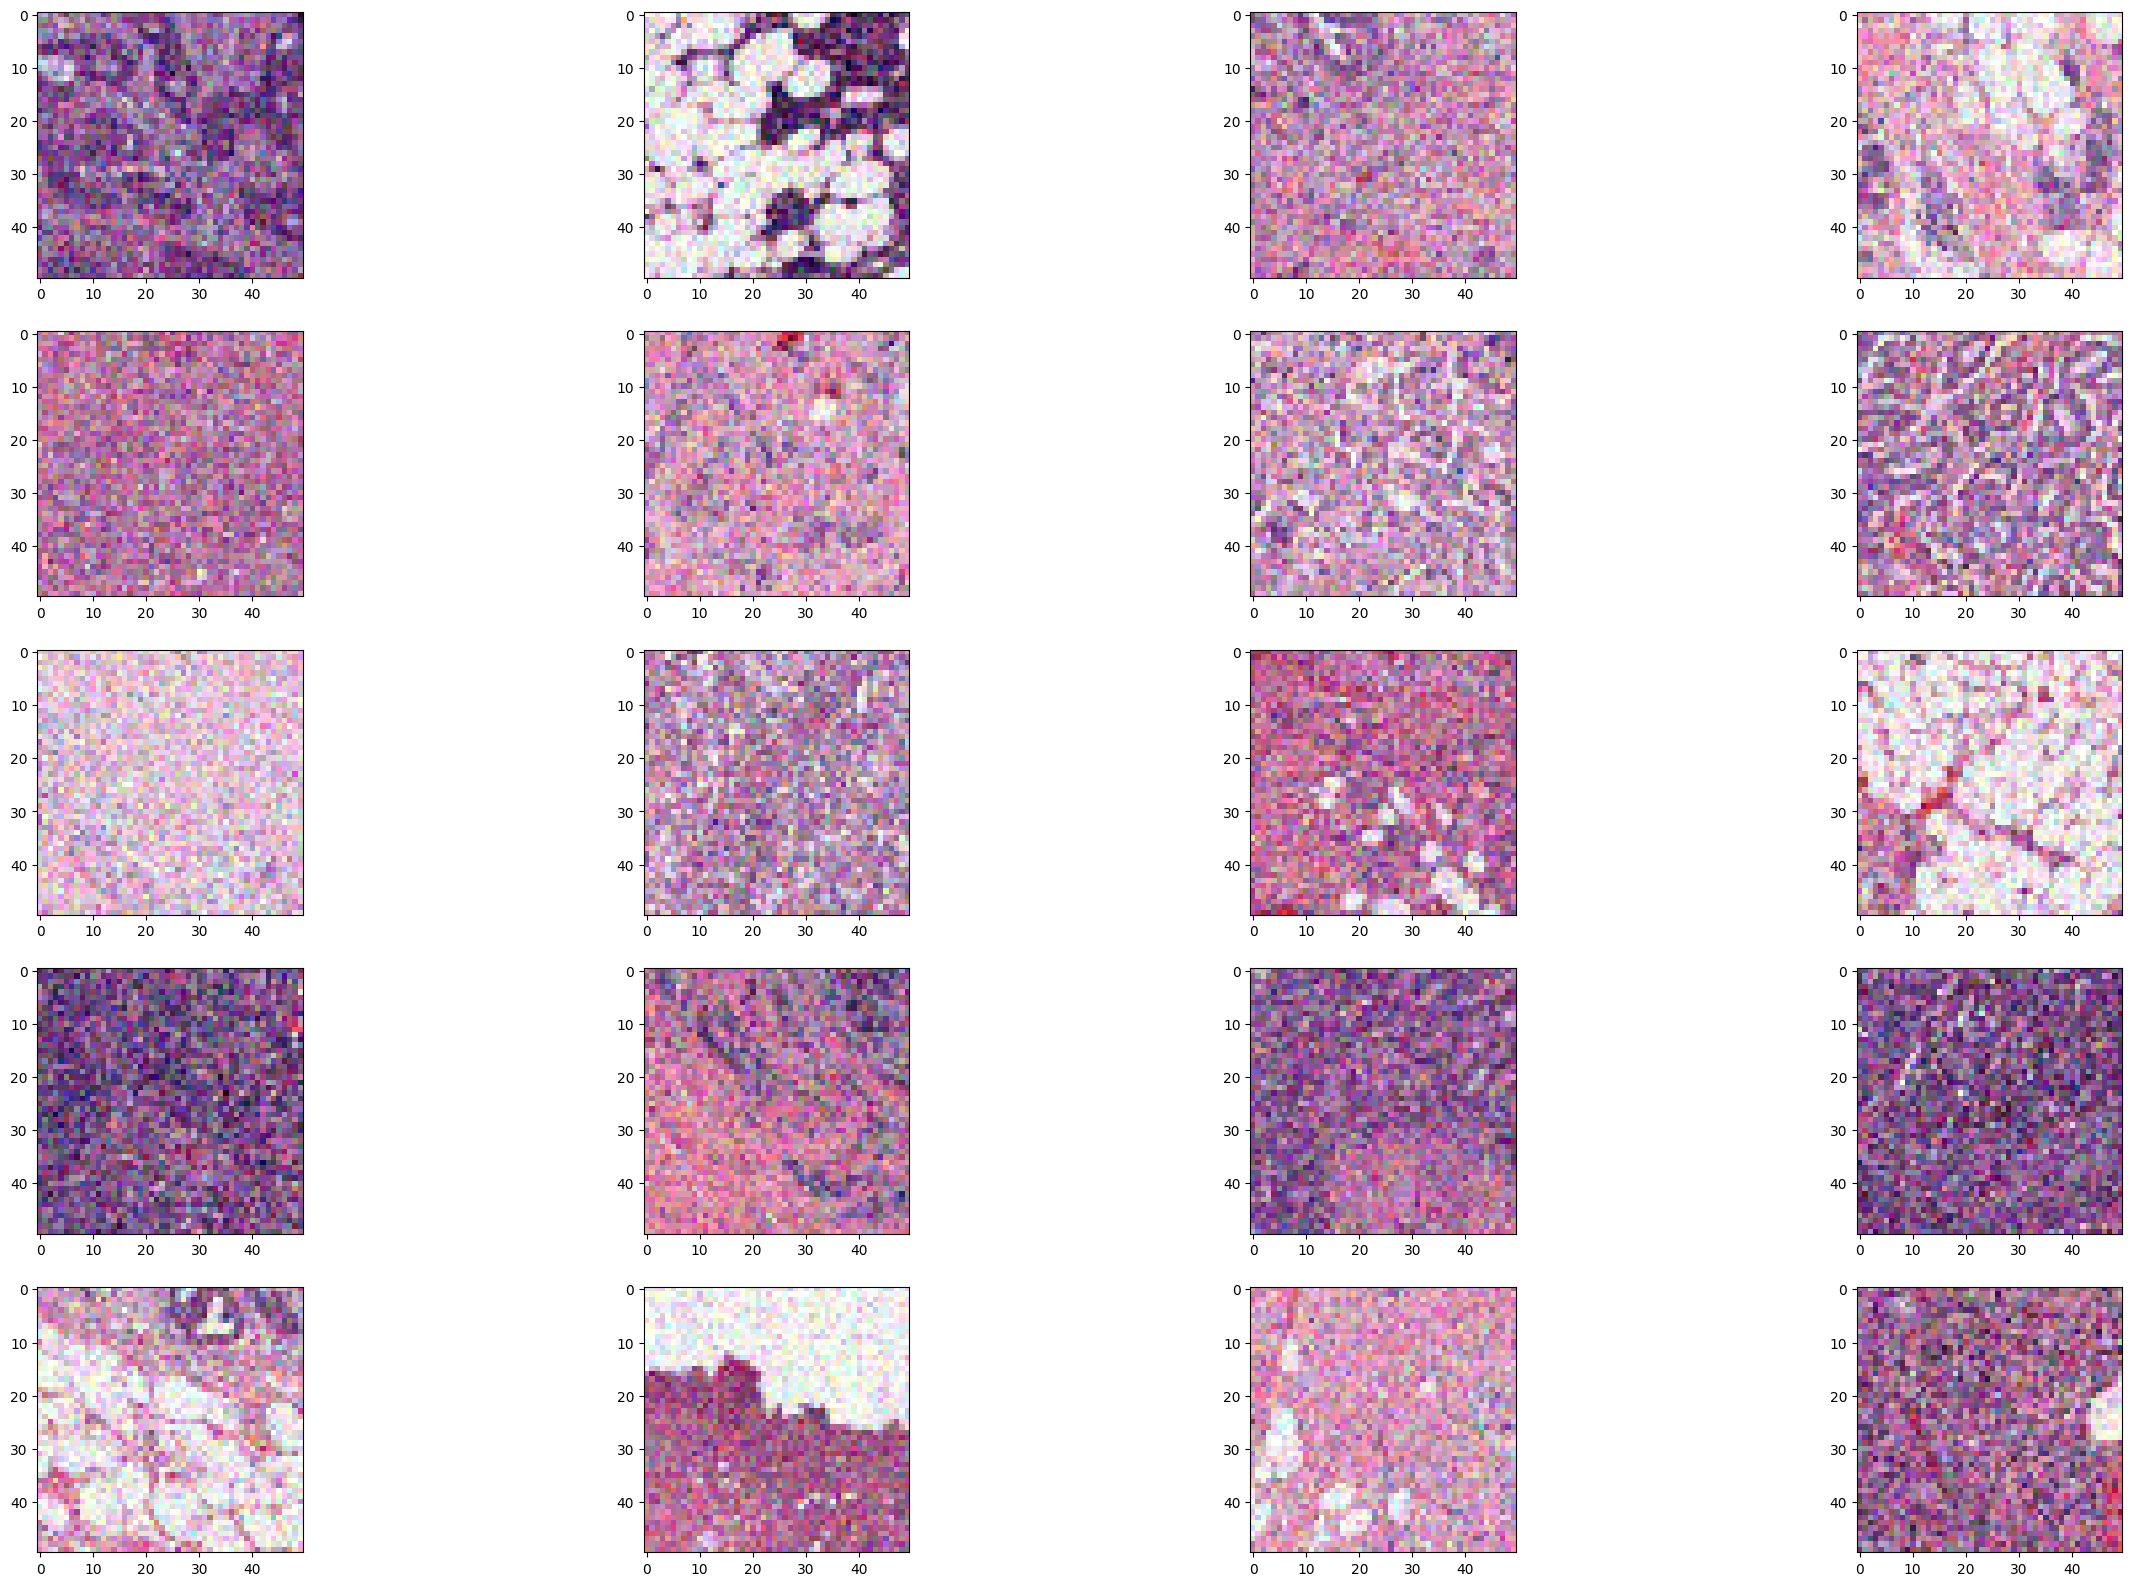

In [24]:
processd_data.target = processd_data.target.astype(int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

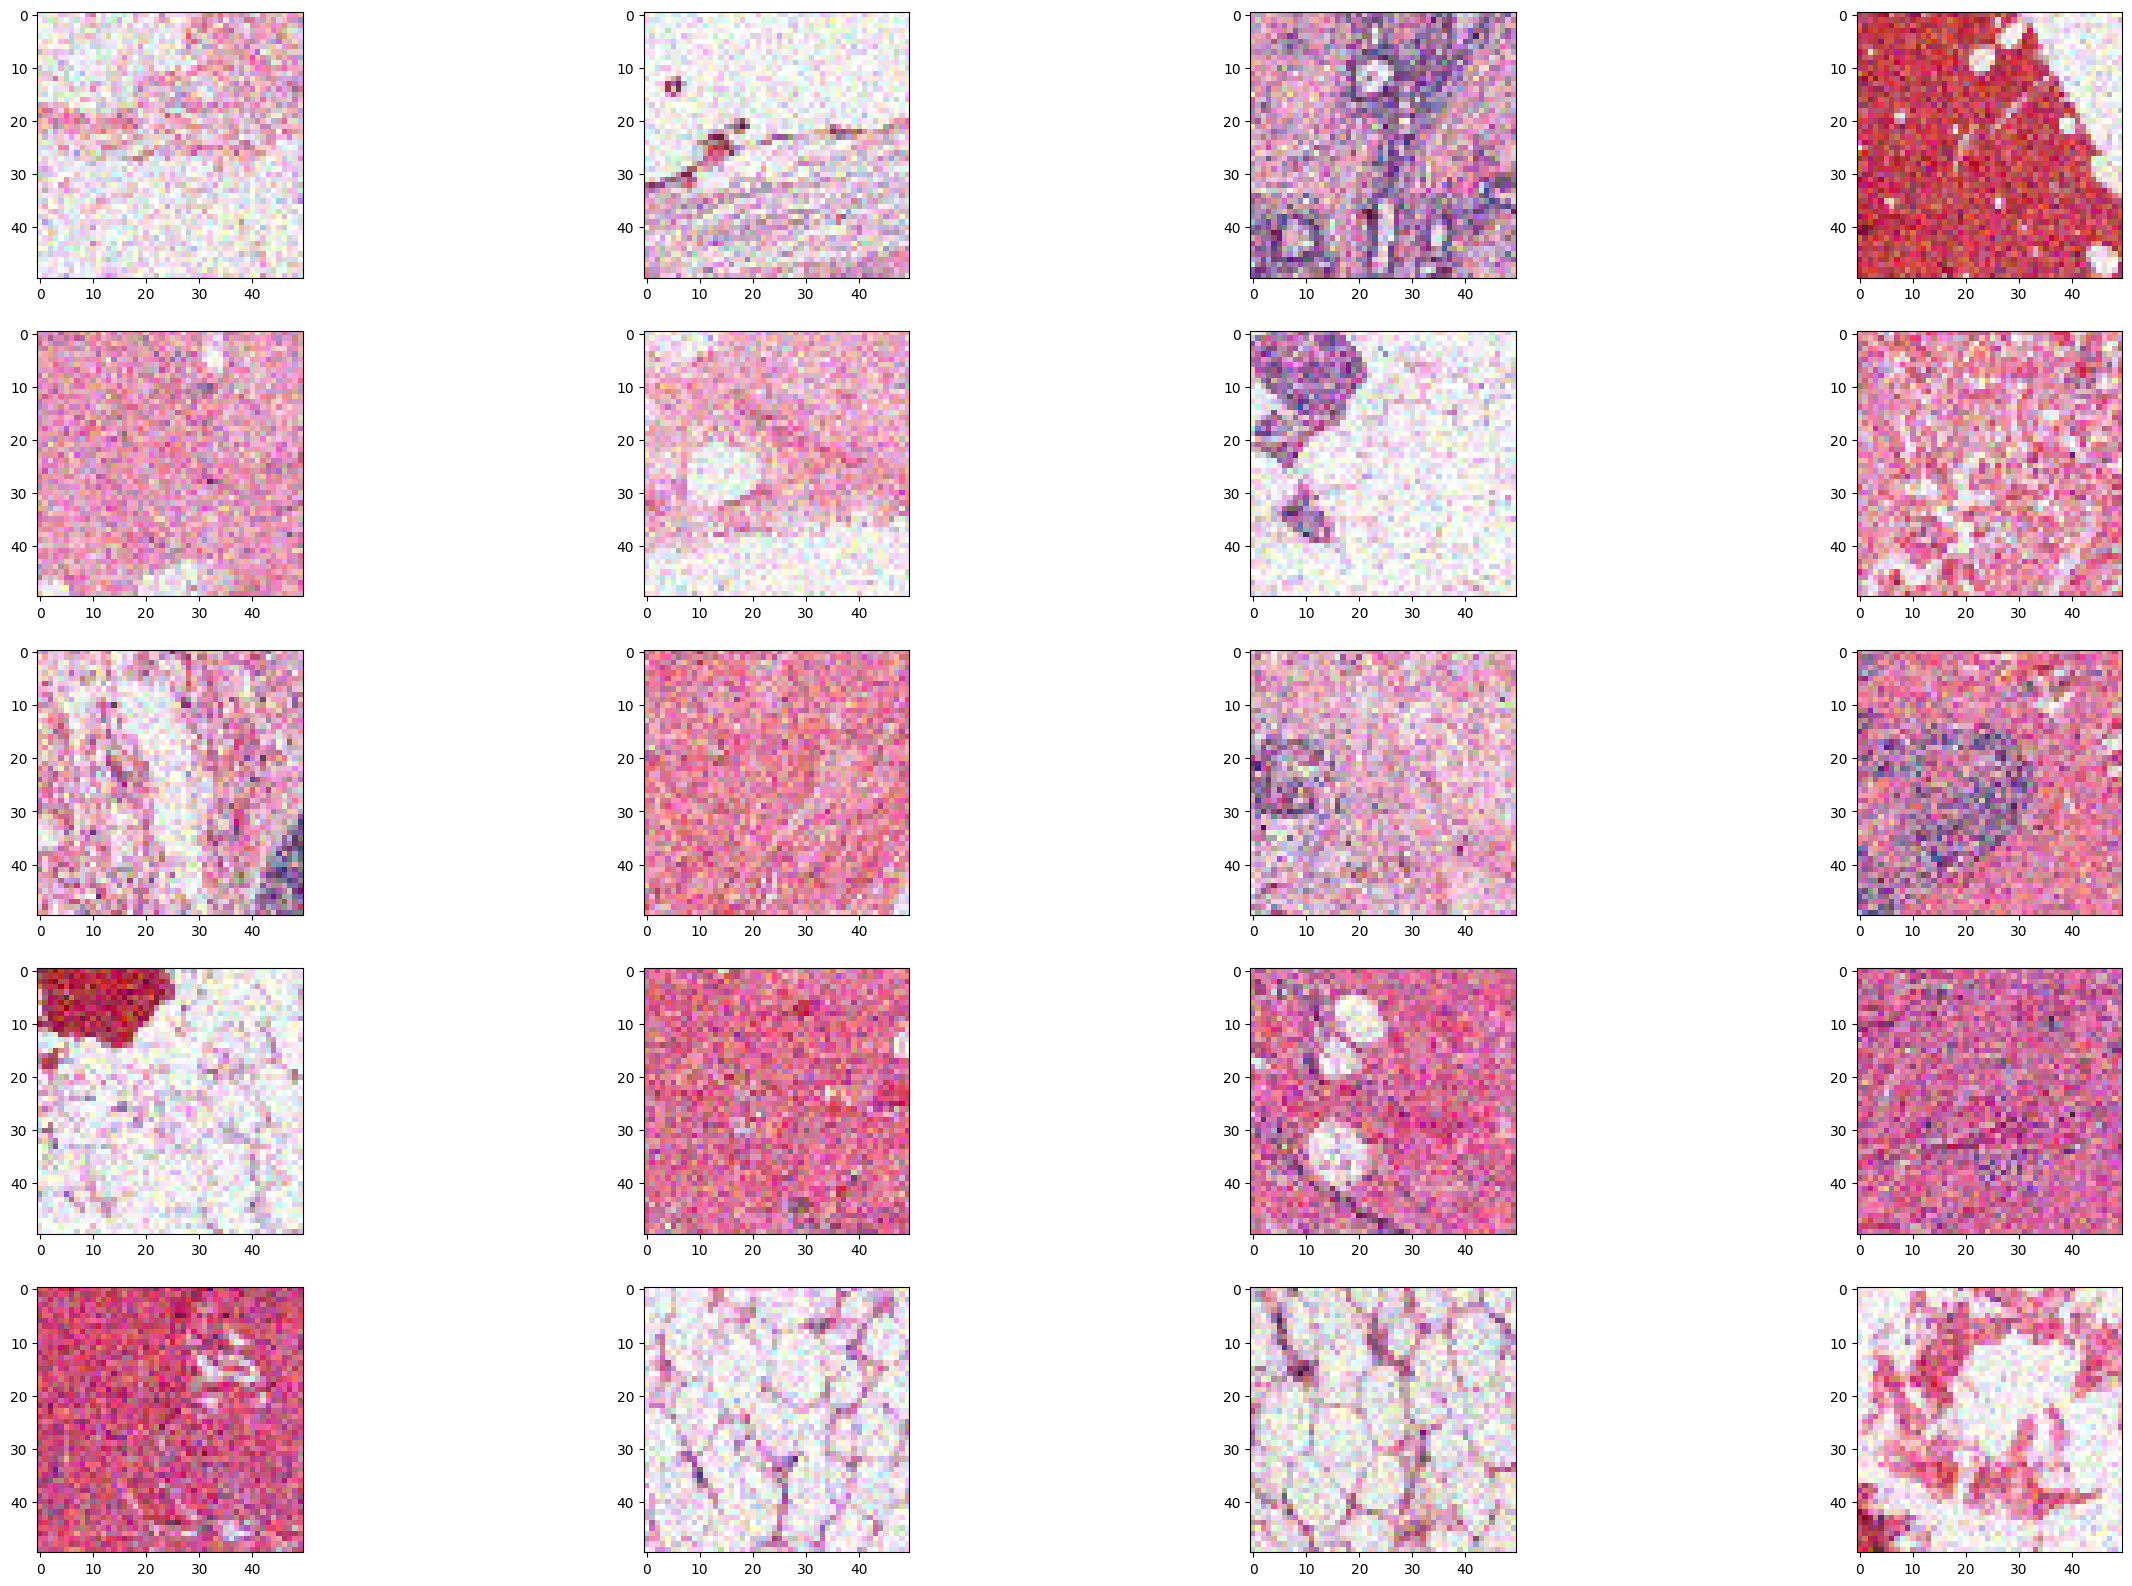

In [25]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [26]:
 # Modeling

In [27]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head()

image_id target
0  13462_idx5_x1851_y2551_class0.png      0
1    14082_idx5_x601_y851_class0.png      0
2    9260_idx5_x2901_y501_class0.png      0
3  12954_idx5_x1601_y2251_class0.png      0
4   13688_idx5_x1151_y751_class0.png      0

In [28]:
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.1, random_state=101, stratify=y)

In [29]:
print(data_train.shape)
print(data_test.shape)

(249771, 2)
(27753, 2)


In [30]:
train = data_train.image_id
test  = data_test.image_id

In [31]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [32]:
train_generation = data_generation.flow_from_directory(
                                        "/kaggle/input/breast-cancer/z/z/train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "/kaggle/input/breast-cancer/z/z/test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')



Found 249771 images belonging to 2 classes.
Found 27753 images belonging to 2 classes.


In [33]:
from tensorflow.keras.optimizers import Adam

my_model = Sequential()

# Convolutional and Pooling Layers with Batch Normalization
my_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(25,25,3)))
my_model.add(BatchNormalization())
my_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Dropout(0.3))

my_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Dropout(0.4))

# Flatten and Dense Layers
my_model.add(Flatten())
my_model.add(Dense(256, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.5))

# Output Layer
my_model.add(Dense(2, activation='softmax'))

# Compiling the model
my_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
my_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 23, 23, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,842 (2.49 MB)

 Trainable params: 651,394 (2.48 MB)

 Non-trainable params: 448 (1.75 KB)

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=7)

my_model.fit(train_generation,validation_data=test_generation,epochs=100, verbose=1, callbacks=early_stop) 

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731227437.855204      93 service.cc:145] XLA service 0x7882c4002ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731227437.855268      93 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


    5/24978 ━━━━━━━━━━━━━━━━━━━━ 17:48 43ms/step - accuracy: 0.5187 - loss: 2.0321

I0000 00:00:1731227446.198387      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24978/24978 ━━━━━━━━━━━━━━━━━━━━ 1662s 66ms/step - accuracy: 0.7977 - loss: 0.5054 - val_accuracy: 0.8253 - val_loss: 0.4523
Epoch 2/100
24978/24978 ━━━━━━━━━━━━━━━━━━━━ 506s 20ms/step - accuracy: 0.8476 - loss: 0.3646 - val_accuracy: 0.8441 - val_loss: 0.3651
Epoch 3/100
24978/24978 ━━━━━━━━━━━━━━━━━━━━ 436s 17ms/step - accuracy: 0.8566 - loss: 0.3452 - val_accuracy: 0.8616 - val_loss: 0.3358
Epoch 4/100
24978/24978 ━━━━━━━━━━━━━━━━━━━━ 431s 17ms/step - accuracy: 0.8611 - loss: 0.3345 - val_accuracy: 0.8523 - val_loss: 0.3492
Epoch 5/100
24978/24978 ━━━━━━━━━━━━━━━━━━━━ 502s 20ms/step - accuracy: 0.8648 - loss: 0.3302 - val_accuracy: 0.8677 - val_loss: 0.3327
Epoch 6/100
24978/24978 ━━━━━━━━━━━━━━━━━━━━ 433s 17ms/step - accuracy: 0.8656 - loss: 0.3246 - val_accuracy: 0.8721 - val_loss: 0.3025
Epoch 7/100
24978/24978 ━━━━━━━━━━━━━━━━━━━━ 430s 17ms/step - accuracy: 0.8668 - loss: 0.3214 - val_accuracy: 0.8634 - val_loss: 0.3369
Epoch 8/100
24978/24978 ━━━━━━━━━━━━━━━━━━━━ 437s 17ms/step

In [36]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

accuracy      loss  val_accuracy  val_loss
0  0.822561  0.425625      0.825316  0.452286
1  0.849915  0.358946      0.844089  0.365075
2  0.858278  0.341442      0.861637  0.335836
3  0.861405  0.333618      0.852340  0.349204
4  0.864560  0.328292      0.867726  0.332744

<Axes: >

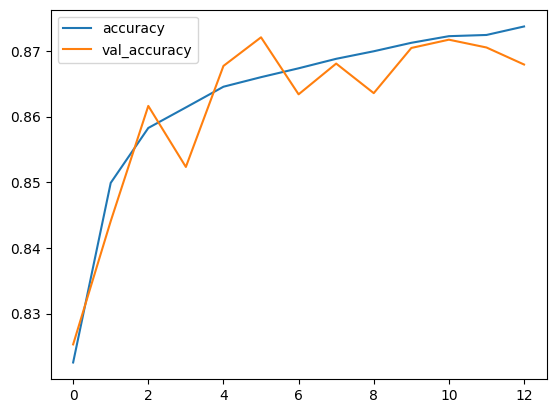

In [37]:
losse[['accuracy','val_accuracy']].plot()


<Axes: >

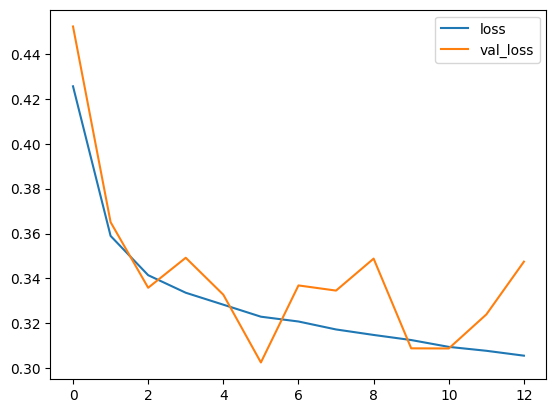

In [38]:
losse[['loss','val_loss']].plot()


In [39]:
val_loss, val_acc = \
my_model.evaluate(test_generation)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

2776/2776 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.8706 - loss: 0.3464
val_loss: 0.3474729657173157
val_acc: 0.867942214012146


In [40]:
model_json = my_model.to_json()


In [41]:

with open("model.json", "w") as json_file:
    json_file.write(model_json)
my_model.save("model.keras")
print("Saved model to disk")

Saved model to disk


In [42]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.keras")
print("Loaded model from disk")
 
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Loaded model from disk


In [43]:
class Api_service :
    def __init__(self,img_file_path):
        self.img_file_path = img_file_path
    def prediction_function(self) :
        predict_generation = data_generation.flow_from_directory(
                                            self.img_file_path,
                                            target_size=(25,25),
                                            batch_size=10,
                                            class_mode='categorical')

        prediction = loaded_model.predict(predict_generation)
        has_cancer = 'The percentage of cancer : '+ str(round(prediction[0][1]*100,2)) + "%"
        has_no_cancer='Percentage of no cancer : ' + str(round(prediction[0][0]*100,2)) + '%'
        return has_cancer,has_no_cancer 


In [44]:
prediction = Api_service("/kaggle/input/breast-cancer/z/z/image_processing/model_tst/trainig")
x,y        = prediction.prediction_function()
print(x)
print(y)

Found 18000 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1800/1800 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step
The percentage of cancer : 5.08%
Percentage of no cancer : 94.92%


In [45]:
prediction = Api_service("/kaggle/input/breast-cancer/z/z/image_processing/model_tst/testing")
x,y        = prediction.prediction_function()
print(x)
print(y)

Found 2000 images belonging to 2 classes.
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step
The percentage of cancer : 1.64%
Percentage of no cancer : 98.36%
